# Case Study #10  - Probability
## Sreelekshmy S L
### NDSA B4

### 1. Read the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('mushrooms.xlsx')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 2.Cleaning

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### No null values found

In [5]:
df.shape

(8124, 23)

### There are 8124 rows and 23 features

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Let's check for the uniques values in each column

In [7]:
cols=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for i in cols:
    print(i)
    print(df[i].value_counts())
    print('**********************')

class
e    4208
p    3916
Name: class, dtype: int64
**********************
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
**********************
cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
**********************
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
**********************
bruises
f    4748
t    3376
Name: bruises, dtype: int64
**********************
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
**********************
gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
**********************
gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
**********************
gill-size
b    5612
n    2512
Name: gill-size, dtype: int64
**********************
gill-color
b    1728
p    1492
w    1202
n 

### a.Here in stalk root column one of the value is '?' representing missing value which need to be replaced

In [8]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

### We will replace '?' with the most frequent value 'b'

In [9]:
df['stalk-root'].replace(to_replace='?',value='b',inplace=True)

In [10]:
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

### b. veil-type column contains only one value so we can drop it

In [11]:
df = df.drop('veil-type',axis=1)

## 3.EDA

In [12]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


C:\Users\SREELEKSHMY S L\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

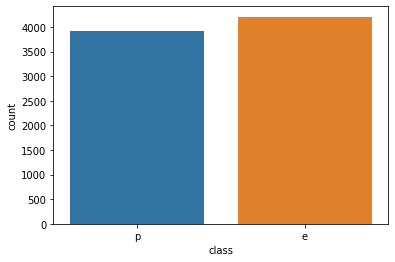

In [13]:
import seaborn as sns
sns.countplot(df['class'])

## 4.Preparing Data for modelling

### Splitting dataset into features and target

In [14]:
X=df.drop('class',axis=1)
y=df['class']

### Onehot encoding all the categorical columns in X

In [15]:
X = pd.get_dummies(X,drop_first=True)

In [16]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
X_train.shape

(6093, 94)

In [19]:
X_test.shape

(2031, 94)

## 5.Applying different classification models and comparing the accuracy scores

### Logistic

In [20]:
from sklearn.linear_model import LogisticRegression
model_l = LogisticRegression()
model_l.fit(X_train,y_train)
y_pred_l = model_l.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
print(accuracy_score(y_test,y_pred_l))
confusion_matrix(y_test,y_pred_l)

1.0


array([[1040,    0],
       [   0,  991]], dtype=int64)

### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(3,15)
acc = []
for i in neighbors:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

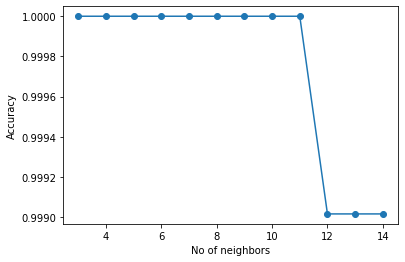

In [24]:
plt.xlabel('No of neighbors')
plt.ylabel('Accuracy')
plt.plot(neighbors,acc,'o-')

In [25]:
model_n =KNeighborsClassifier(n_neighbors=4)
model_n.fit(X_train,y_train)
y_pred_n = model_n.predict(X_test)
print(accuracy_score(y_test,y_pred_n))
confusion_matrix(y_test,y_pred_n)

1.0


array([[1040,    0],
       [   0,  991]], dtype=int64)

## SVM

In [26]:
from sklearn.svm import SVC
model_s =SVC()
model_s.fit(X_train,y_train)
y_pred_s = model_s.predict(X_test)
print(accuracy_score(y_test,y_pred_s))
confusion_matrix(y_test,y_pred_s)


1.0


array([[1040,    0],
       [   0,  991]], dtype=int64)

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_d =DecisionTreeClassifier()
model_d.fit(X_train,y_train)
y_pred_d = model_d.predict(X_test)
print(accuracy_score(y_test,y_pred_d))
confusion_matrix(y_test,y_pred_d)

1.0


array([[1040,    0],
       [   0,  991]], dtype=int64)

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_r = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_r))
confusion_matrix(y_test,y_pred_r)

1.0


array([[1040,    0],
       [   0,  991]], dtype=int64)

### All the above models give 100% accuracy.

# 6. Naive Bayes
## a. Gaussian

In [29]:
from sklearn.naive_bayes import GaussianNB
model_g =GaussianNB()
model_g.fit(X_train,y_train)
y_pred_g = model_g.predict(X_test)
print(accuracy_score(y_test,y_pred_g))
confusion_matrix(y_test,y_pred_g)

0.9433776464795667


array([[925, 115],
       [  0, 991]], dtype=int64)

### Gaussian model gives 94 % accuracy

 ## b.Bernoulli

In [30]:
from sklearn.naive_bayes import BernoulliNB
model_b =BernoulliNB()
model_b.fit(X_train,y_train)
y_pred_b = model_b.predict(X_test)
print(accuracy_score(y_test,y_pred_b))
confusion_matrix(y_test,y_pred_b)

0.9374692269817824


array([[1031,    9],
       [ 118,  873]], dtype=int64)

### Bernoulli model gives 93.7 % accuracy